170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.3272 - loss: 1.8099 - val_accuracy: 0.5294 - val_loss: 1.3051
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.5525 - loss: 1.2542 - val_accuracy: 0.5684 - val_loss: 1.2282
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 79ms/step - accuracy: 0.6182 - loss: 1.0775 - val_accuracy: 0.6432 - val_loss: 1.0200
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6586 - loss: 0.9742 - val_accuracy: 0.6576 - val_loss: 0.9794
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.6811 - loss: 0.9102 - val_accuracy: 0.6697 - val_loss: 0.9395
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7161 - loss: 0.8172 - val_accuracy: 0.6859 - val_loss: 0.9016
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.7313 - loss: 0.7683 - val_accuracy: 0.6915 - val_loss: 0.8990
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.7473 - loss: 0.7265 - 

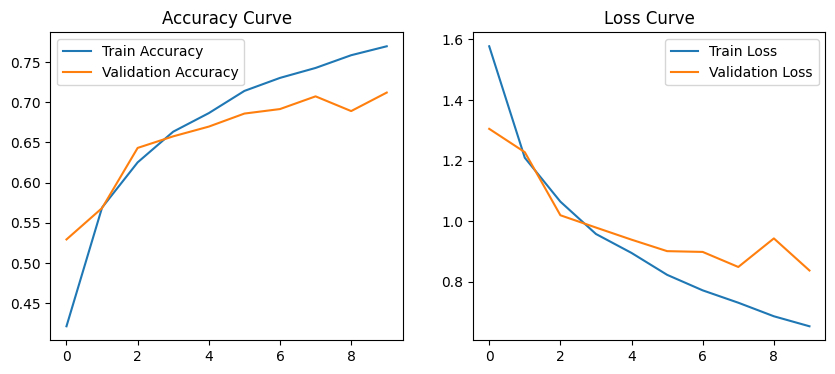

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


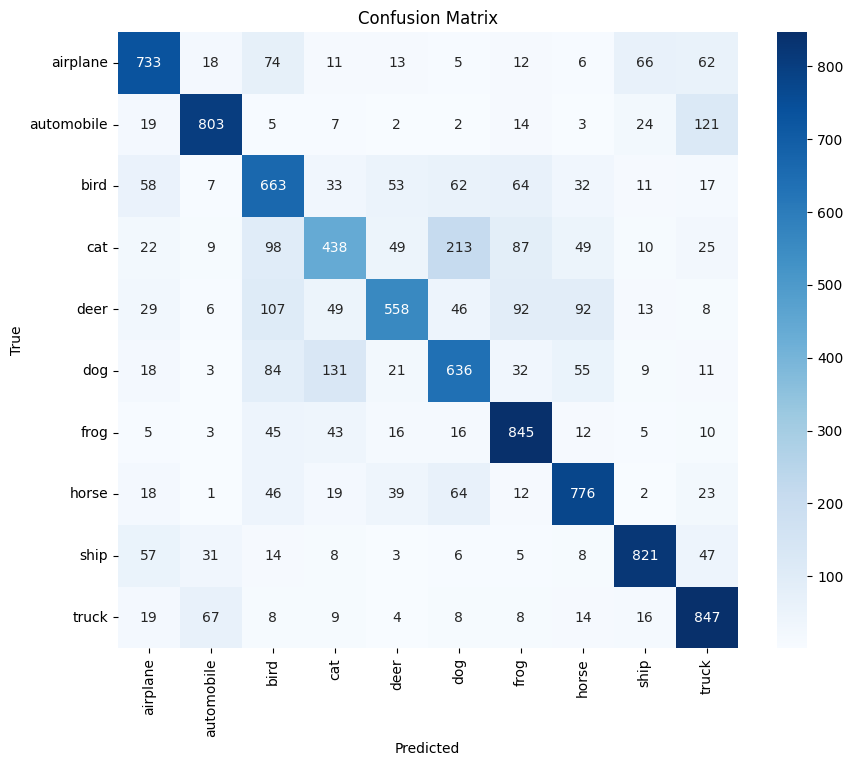


Classification Report:

              precision    recall  f1-score   support

    airplane       0.75      0.73      0.74      1000
  automobile       0.85      0.80      0.82      1000
        bird       0.58      0.66      0.62      1000
         cat       0.59      0.44      0.50      1000
        deer       0.74      0.56      0.63      1000
         dog       0.60      0.64      0.62      1000
        frog       0.72      0.84      0.78      1000
       horse       0.74      0.78      0.76      1000
        ship       0.84      0.82      0.83      1000
       truck       0.72      0.85      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



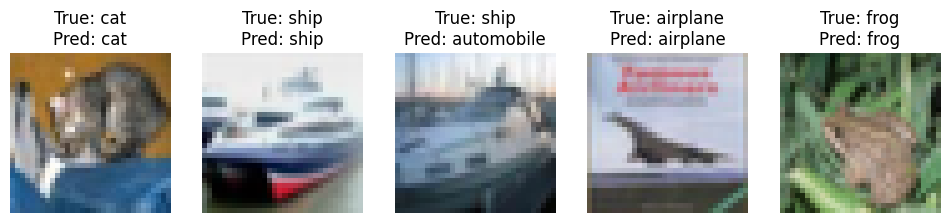

In [ ]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 2: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Step 3: Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 4: Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test), batch_size=64)

# Step 6: Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 7: Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Step 8: Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 9: Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Step 10: Visualize some predictions
n = 5
plt.figure(figsize=(12,6))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_true[i]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.show()